In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
# root://cmseos.fnal.gov//eos/uscms/store/group/lpcbacon/dazsle/zprimebits-v15.01/skim/TTToHadronic_TuneCP5_13TeV_powheg_pythia8_0.root
fin = uproot.open("TTToHadronic_TuneCP5_13TeV_powheg_pythia8_0.root")
tree = fin['otree']

In [3]:
def clean(val, default):
    val[np.isnan(val)|(val==-999.)] = default

In [4]:
pt0 = tree['AK8Puppijet0_pt'].array()
msd0 = tree['AK8Puppijet0_msd'].array()
ddb0 = tree['AK8Puppijet0_deepdoubleb'].array()
clean(ddb0, -np.inf)
n2_jet0 = tree['AK8Puppijet0_N2sdb1'].array()
clean(n2_jet0, np.inf)
doublebtag = tree['AK8Puppijet0_doublecsv'].array()
tau21_jet0 = tree['AK8Puppijet0_tau21'].array()
tau32_jet0 = tree['AK8Puppijet0_tau32'].array()
tau32_jet1 = tree['AK8Puppijet1_tau32'].array()
njets = tree['nAK4PuppijetsPt30'].array()
sumht = tree['puppet'].array()

<IPython.core.display.Javascript object>


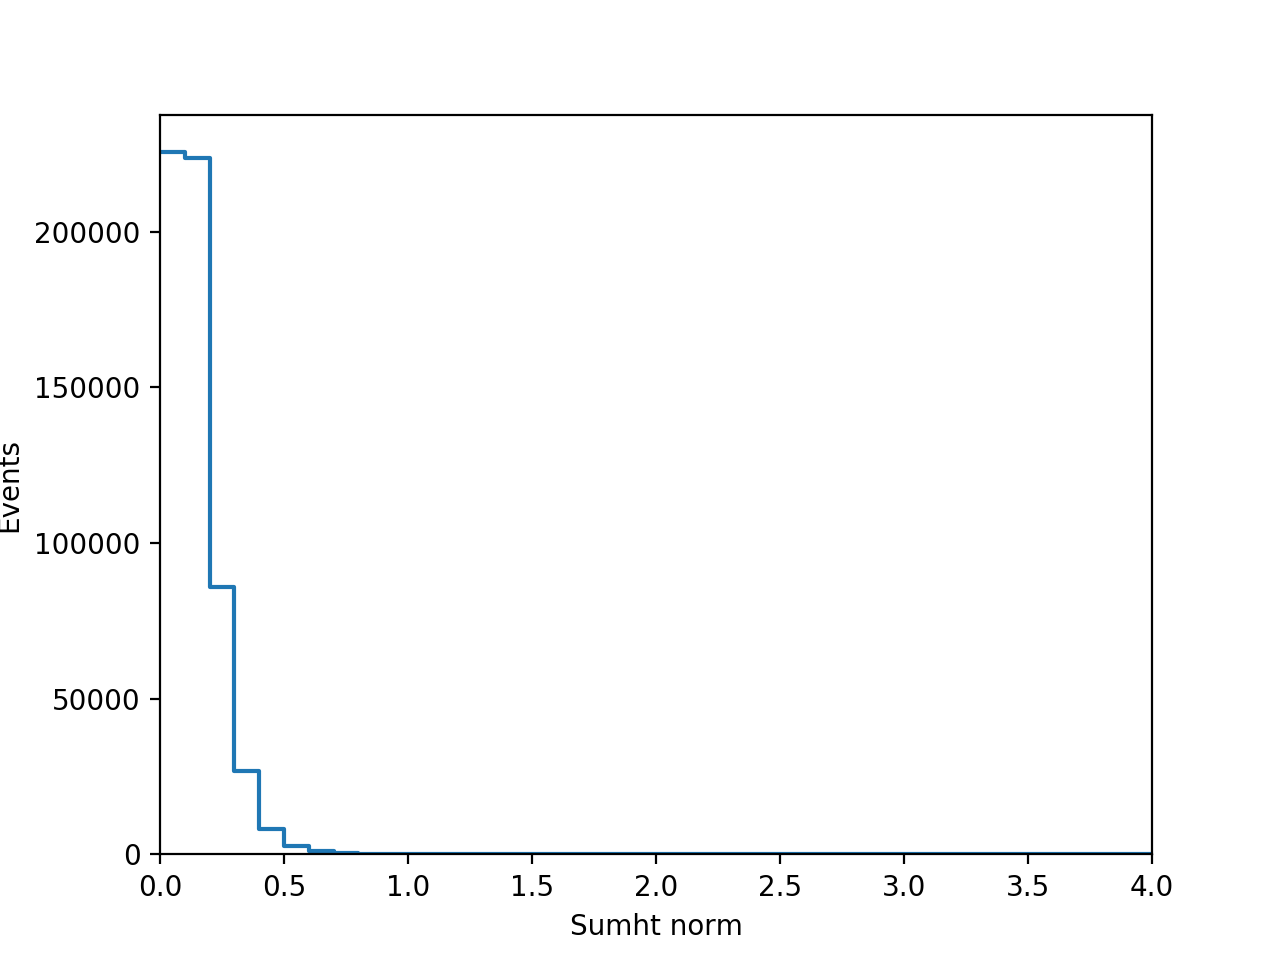

(<Figure size 640x480 with 1 Axes>,
 {'None': [(<ErrorbarContainer object of 3 artists>,
    <ErrorbarContainer object of 3 artists>)]})

In [5]:
clean(pt0, 1.)
h = hist.Hist("Events", hist.Bin("sumht", "Sumht norm", 40, 0, 4))
h.fill(sumht=sumht/pt0)
plot.plot1d(h, error_opts={})

In [7]:
tau32_jet0[tau21_jet0>-999].max()

1.1555041074752808

<IPython.core.display.Javascript object>


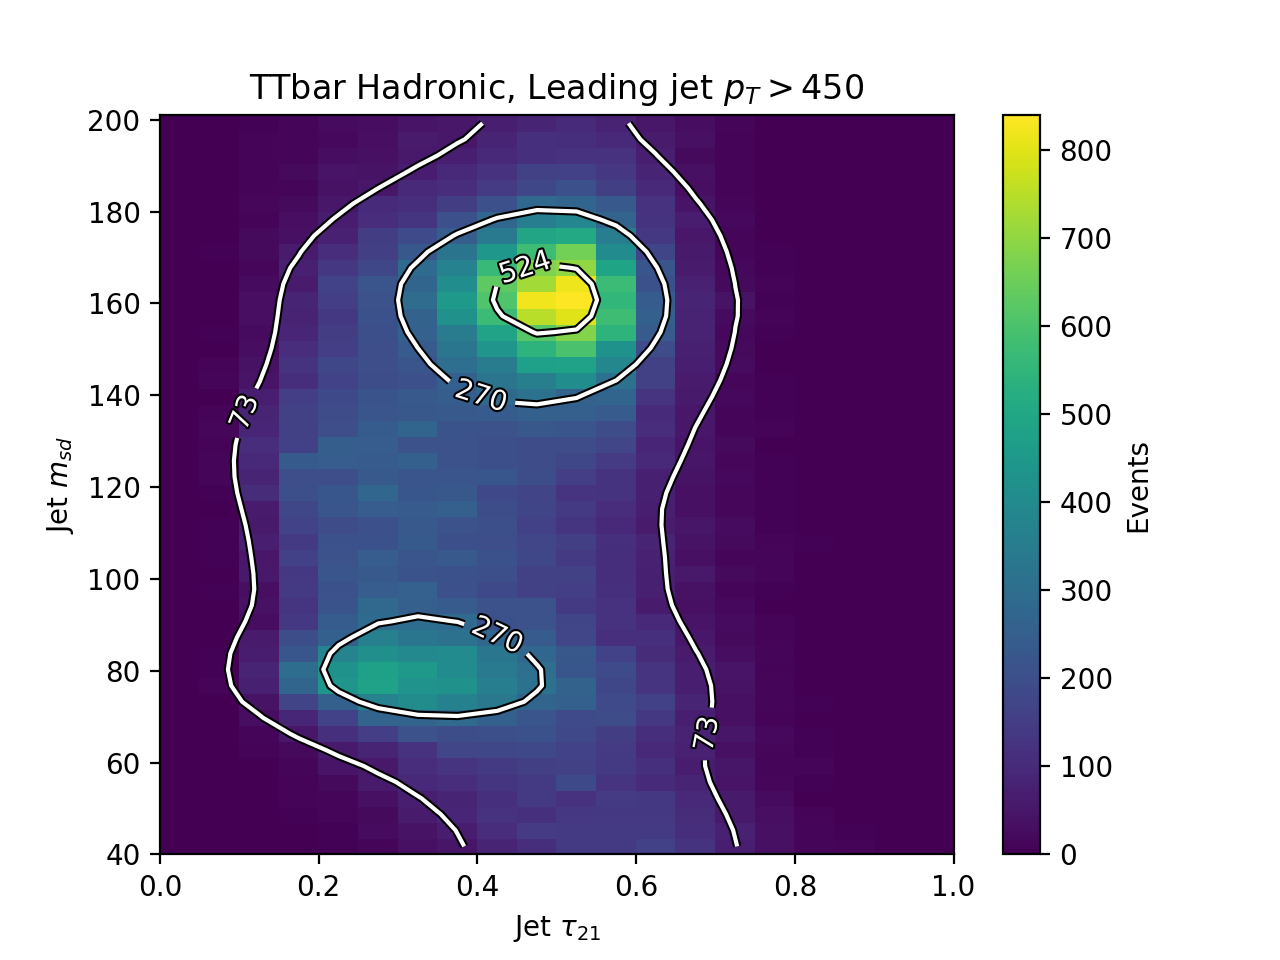

[None, None, None, None, None, None, None, None, None, None]

In [6]:
h = hist.Hist("Events", 
              hist.Bin("tau21", r"Jet $\tau_{21}$", 20, 0, 1),
              hist.Bin("msd", "Jet $m_{sd}$", 23*2, 40, 201)
             )
cut = (pt0>450.)
h.fill(msd=msd0[cut], tau21=tau21_jet0[cut])
fig, ax, _ = plot.plot2d(h, xaxis="tau21", patch_opts={})
ax.set_title('TTbar Hadronic, Leading jet $p_{T}>450$')

import scipy.ndimage
a = scipy.ndimage.gaussian_filter(h.values()[()], sigma=1.5)
quantiles = np.quantile(a, [0.5, 0.9, 0.99])
x, y = np.meshgrid(*tuple(ax.centers() for ax in h.axes()))
cc = ax.contour(x, y, a.T, quantiles, colors='w')
cclabels = ax.clabel(cc, inline=1, fontsize=10, fmt='%.0f')

import matplotlib.patheffects as patheffects
plt.setp(cc.collections, path_effects=[patheffects.withStroke(linewidth=3, foreground='k')])
plt.setp(cclabels, path_effects=[patheffects.withStroke(linewidth=1.5, foreground='k')])


<IPython.core.display.Javascript object>


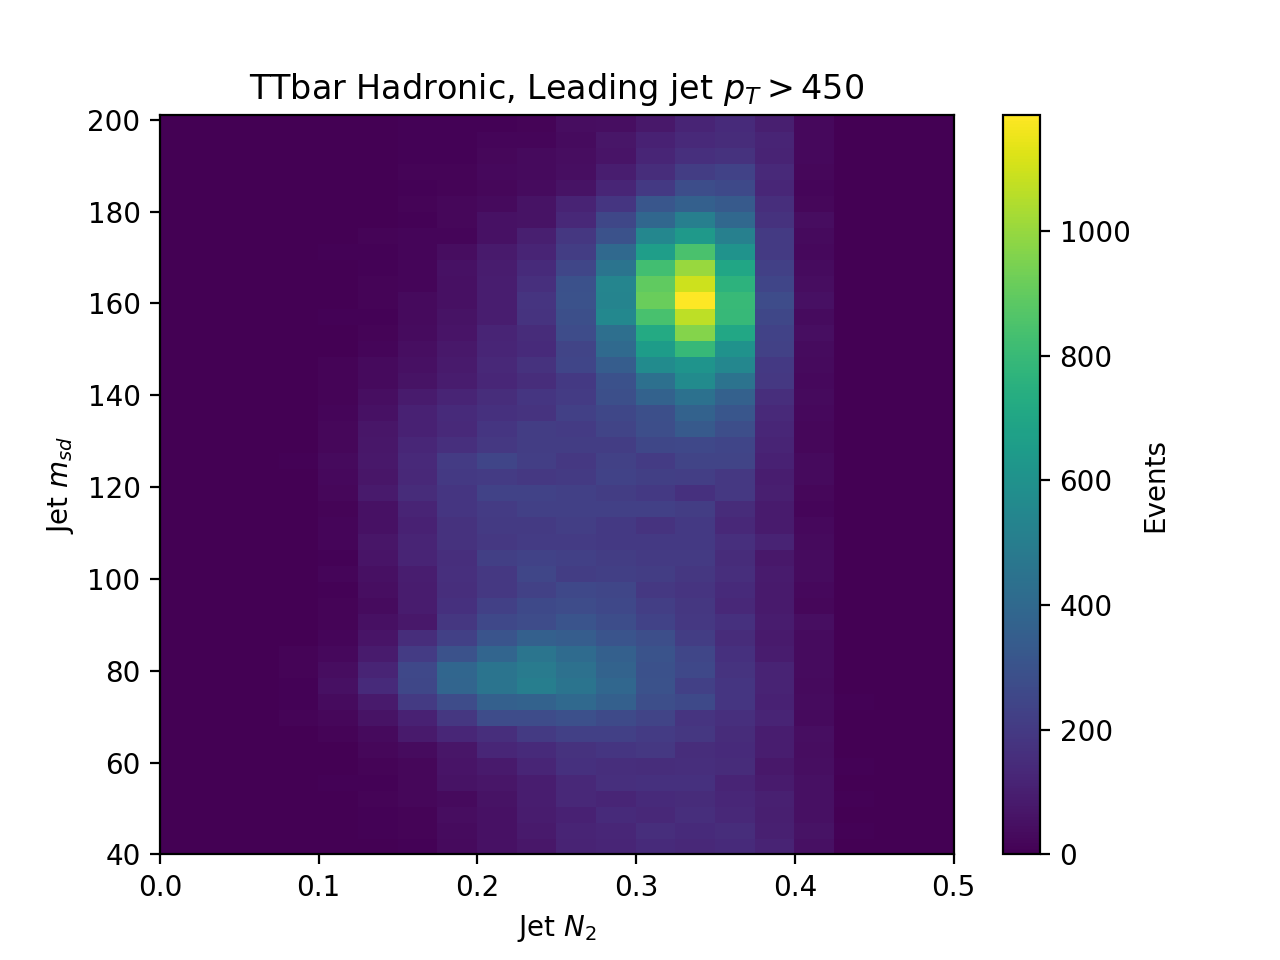

Text(0.5, 1.0, 'TTbar Hadronic, Leading jet $p_{T}>450$')

In [7]:
h = hist.Hist("Events", hist.Bin("N2", "Jet $N_{2}$", 20, 0, .5), hist.Bin("msd", "Jet $m_{sd}$", 23*2, 40, 201))
cut = (pt0>450.)
h.fill(msd=msd0[cut], N2=n2_jet0[cut])
fig, ax, _ = plot.plot2d(h, xaxis="N2", patch_opts={})
ax.set_title('TTbar Hadronic, Leading jet $p_{T}>450$')


In [13]:
e4_v2_jet0 = tree["AK8Puppijet0_e4_v2_sdb1"].array()
clean(e4_v2_jet0, 1.)
e3_v1_jet0 = tree["AK8Puppijet0_e3_v1_sdb1"].array()
clean(e3_v1_jet0, -1)
N3_jet0 = e4_v2_jet0/np.maximum(1e-4, e3_v1_jet0)**2

In [8]:
e4_v2_jet1 = tree["AK8Puppijet1_e4_v2_sdb1"].array()
clean(e4_v2_jet1, 1.)
e3_v1_jet1 = tree["AK8Puppijet1_e3_v1_sdb1"].array()
clean(e3_v1_jet1, -1)
N3_jet1 = e4_v2_jet1/np.maximum(1e-4, e3_v1_jet1)**2
msd1 = tree['AK8Puppijet1_msd'].array()


<IPython.core.display.Javascript object>


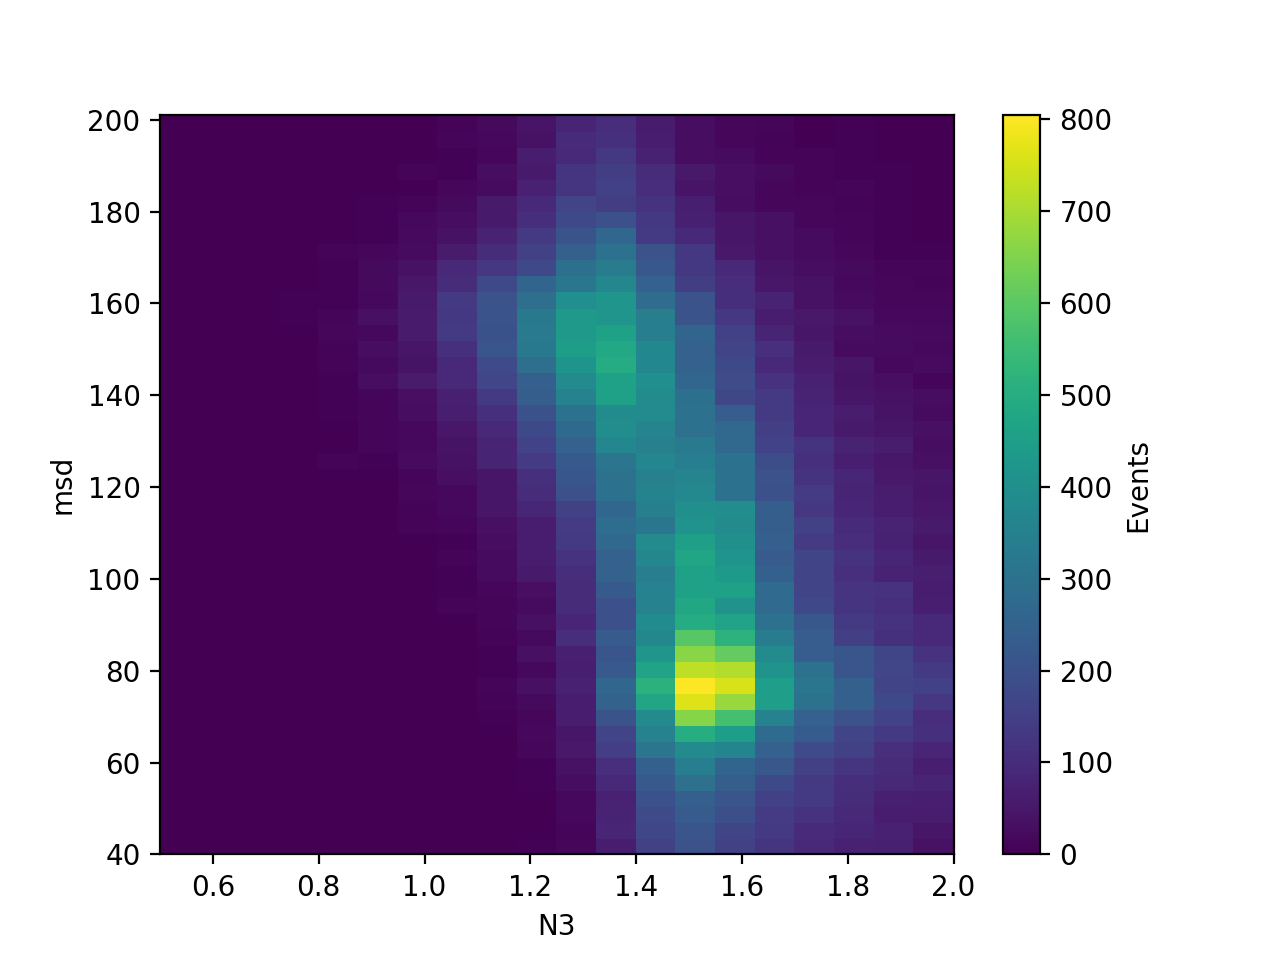

(<Figure size 640x480 with 2 Axes>,
 {'patches': <matplotlib.collections.QuadMesh at 0x120fc3518>})

In [9]:
h = hist.Hist("Events", hist.Bin("N3", "N3", 20, 0.5, 2), hist.Bin("msd", "msd", 23*2, 40, 201))
cut = (pt0>450.)
h.fill(msd=msd1[cut], N3=N3_jet1[cut])
plot.plot2d(h, xaxis="N3", patch_opts={})

<IPython.core.display.Javascript object>


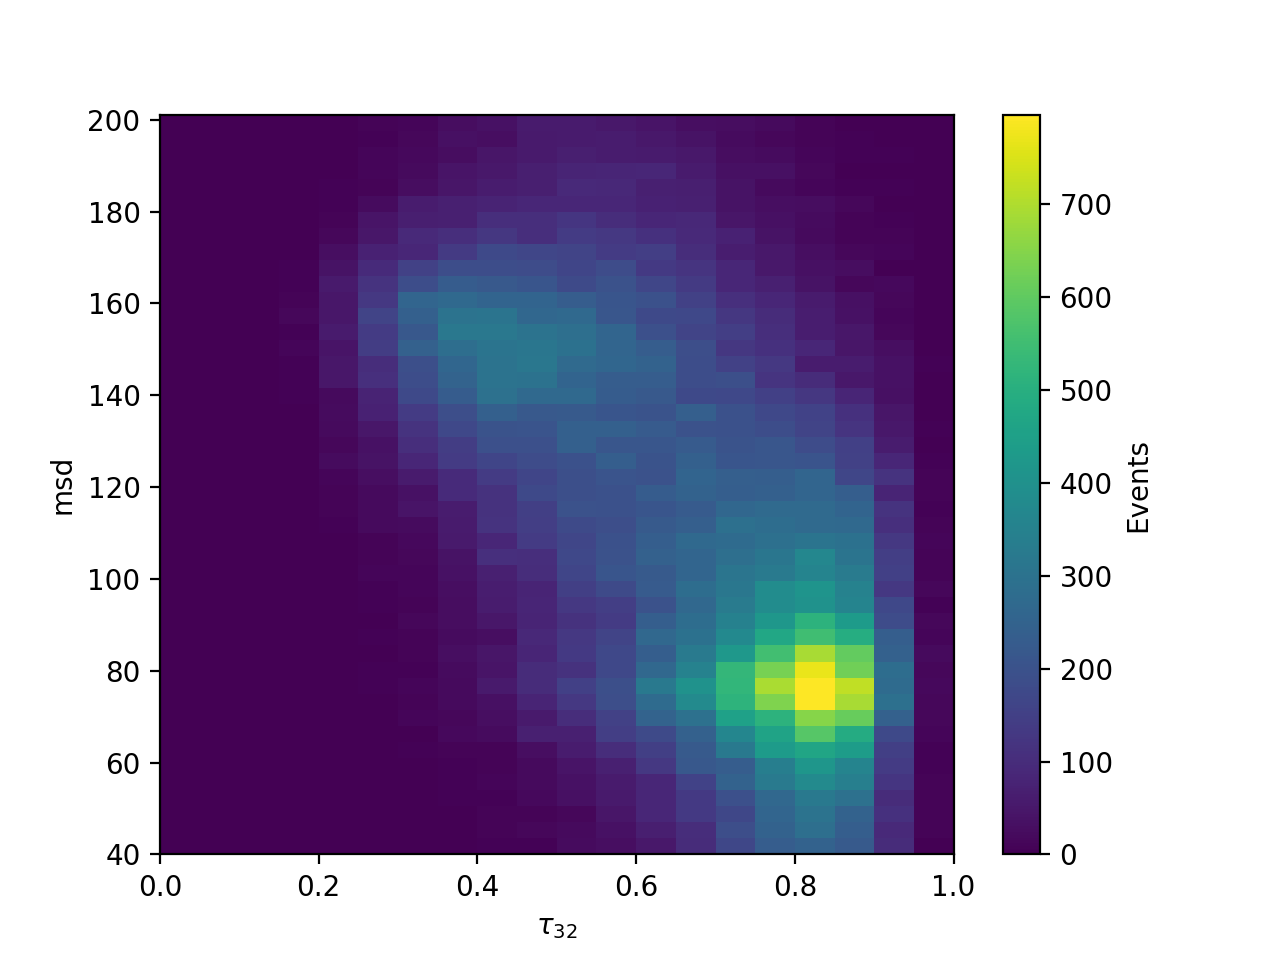

(<Figure size 640x480 with 2 Axes>,
 {'patches': <matplotlib.collections.PatchCollection at 0x17cbf9860>})

In [19]:
h = hist.Hist("Events", hist.Bin("tau32", r"$\tau_{32}$", 20, 0, 1), hist.Bin("msd", "msd", 23*2, 40, 201))
cut = (pt0>450.)
h.fill(msd=msd1[cut], tau32=tau32_jet1[cut])
plot.plot2d(h, xaxis="tau32", patch_opts={})

<IPython.core.display.Javascript object>


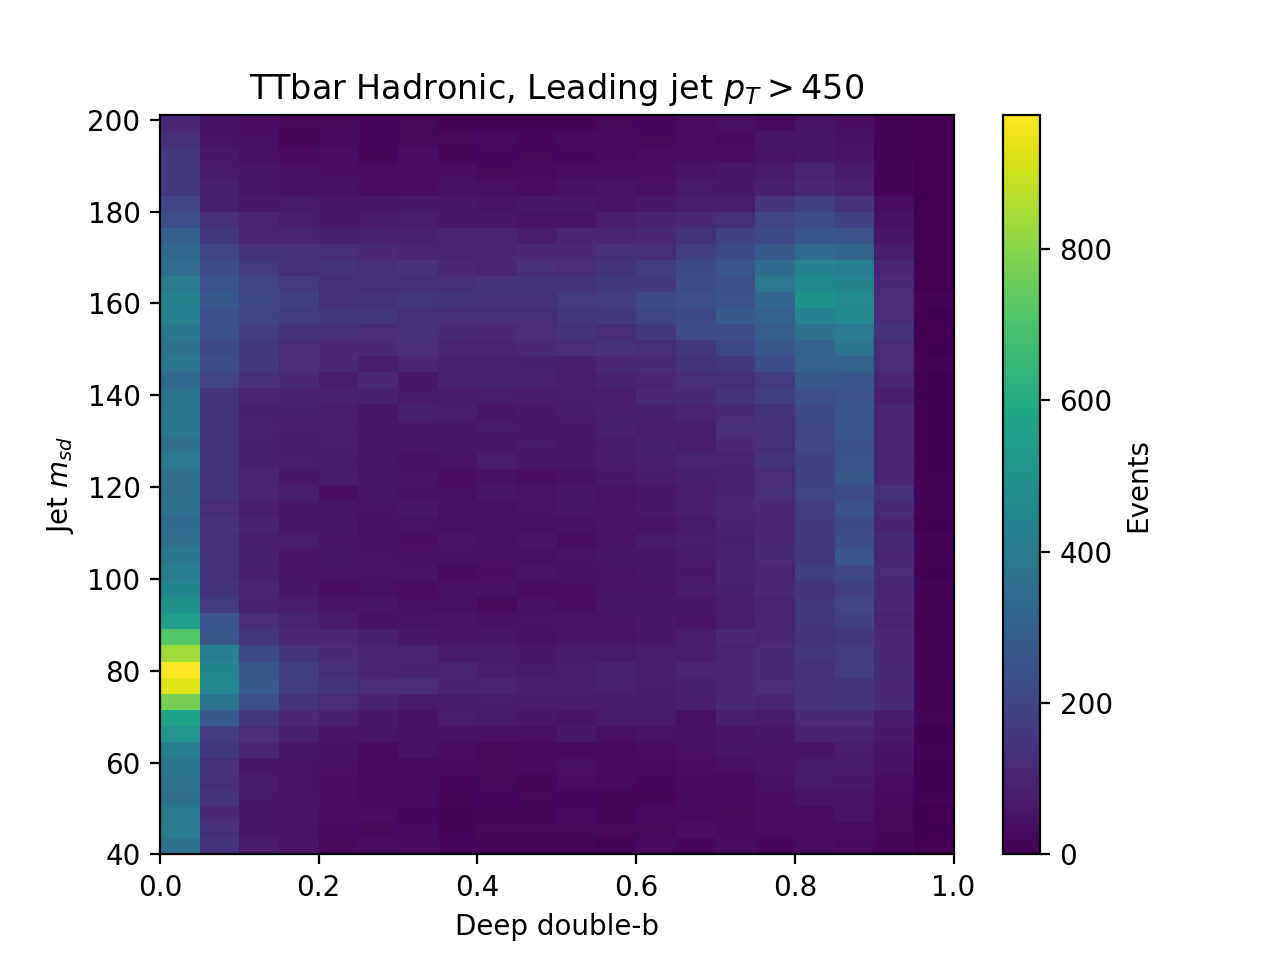

Text(0.5, 1.0, 'TTbar Hadronic, Leading jet $p_{T}>450$')

In [15]:
h = hist.Hist("Events", hist.Bin("ddb", "Deep double-b", 20, 0, 1), hist.Bin("msd", "Jet $m_{sd}$", 23*2, 40, 201))
cut = (pt0>450.)
h.fill(msd=msd0[cut], ddb=ddb0[cut])
fig, ax, _ = plot.plot2d(h, xaxis="ddb", patch_opts={})
ax.set_title('TTbar Hadronic, Leading jet $p_{T}>450$')


<IPython.core.display.Javascript object>


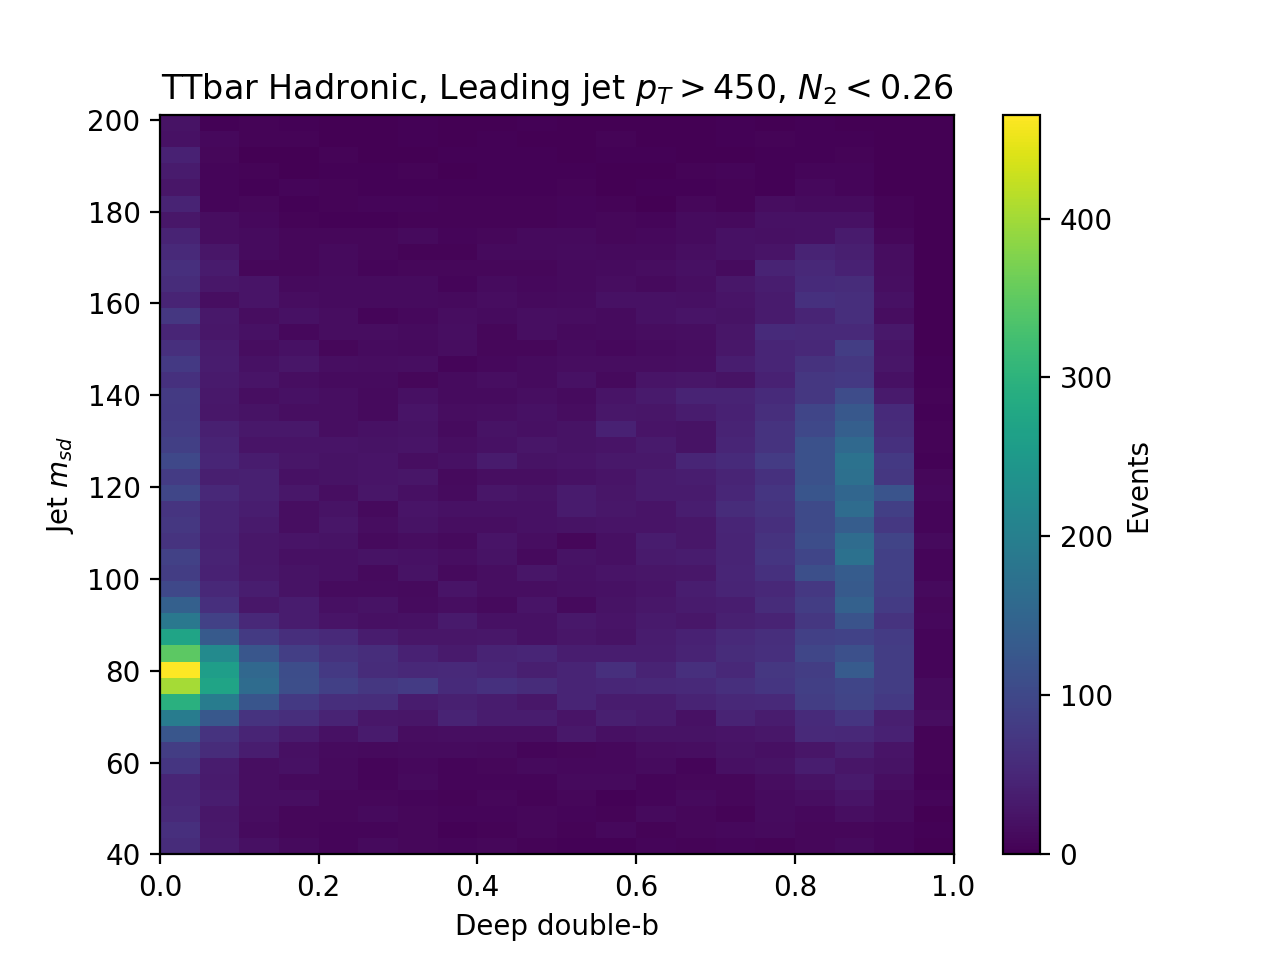

Text(0.5, 1.0, 'TTbar Hadronic, Leading jet $p_{T}>450$, $N_{2}<0.26$')

In [17]:
h = hist.Hist("Events", hist.Bin("ddb", "Deep double-b", 20, 0, 1), hist.Bin("msd", "Jet $m_{sd}$", 23*2, 40, 201))
cut = (pt0>450.) & (n2_jet0<.26)  # 50% of N2 DDT map values are between 0.24 and 0.27
h.fill(msd=msd0[cut], ddb=ddb0[cut])
fig, ax, _ = plot.plot2d(h, xaxis="ddb", patch_opts={})
ax.set_title('TTbar Hadronic, Leading jet $p_{T}>450$, $N_{2}<0.26$')


<IPython.core.display.Javascript object>


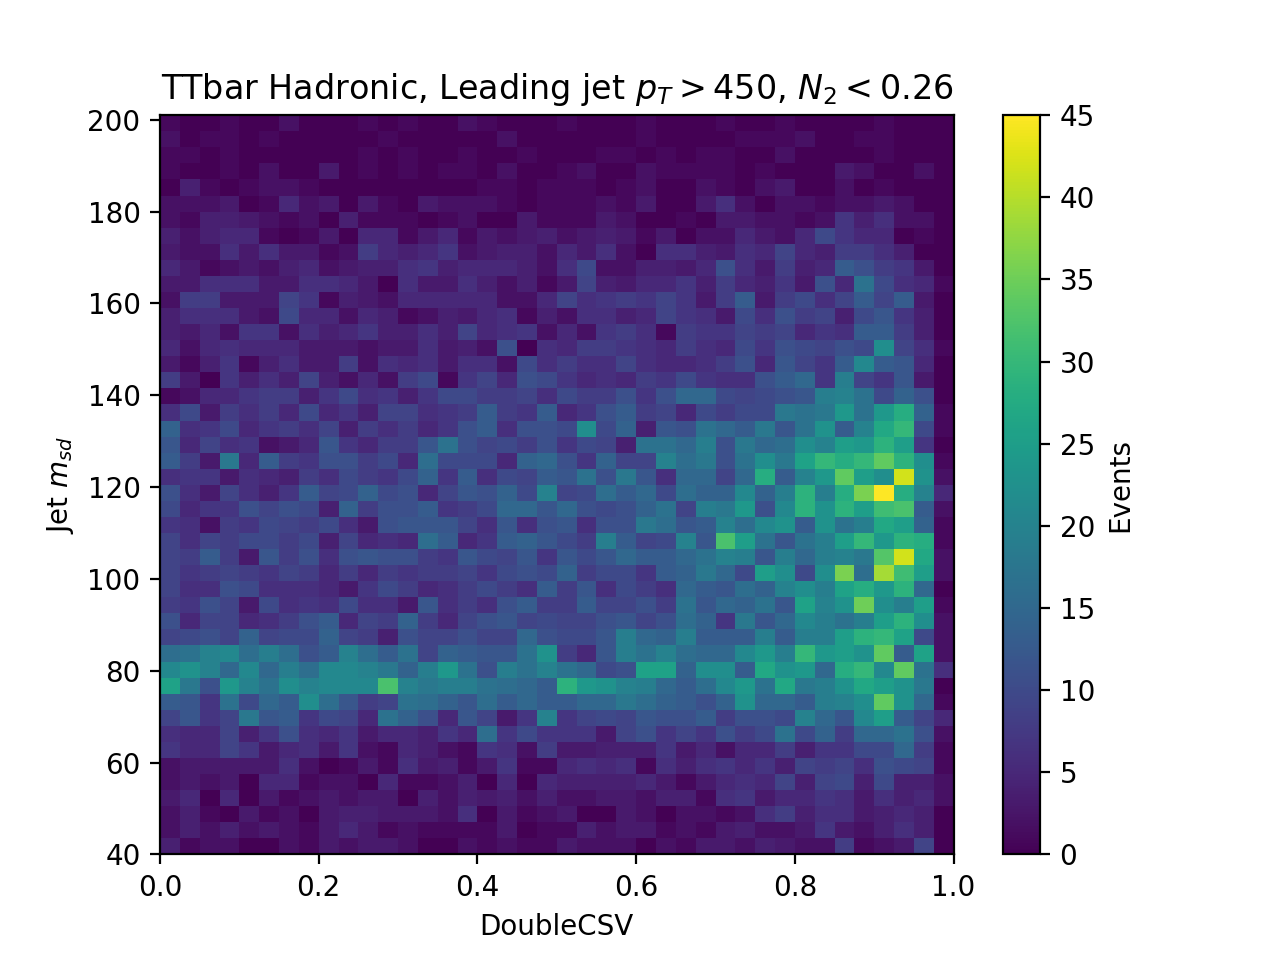

Text(0.5, 1.0, 'TTbar Hadronic, Leading jet $p_{T}>450$, $N_{2}<0.26$')

In [11]:
h = hist.Hist("Events", hist.Bin("doubleb", "DoubleCSV", 40, 0, 1), hist.Bin("msd", "Jet $m_{sd}$", 23*2, 40, 201))
cut = (pt0>450.) & (n2_jet0<.26)  # (tau21_jet0<0.2)
h.fill(msd=msd0[cut], doubleb=doublebtag[cut])
fig, ax, _ = plot.plot2d(h, xaxis="doubleb", patch_opts={})
ax.set_title(r'TTbar Hadronic, Leading jet $p_{T}>450$, $N_{2}<0.26$')


In [6]:
ak4jet0_dPhi08 = tree['AK4Puppijet0_dPhi08'].array()
ak4jet1_dPhi08 = tree['AK4Puppijet1_dPhi08'].array()
ak4jet2_dPhi08 = tree['AK4Puppijet2_dPhi08'].array()
ak4jet0_deepcsv = tree['AK4Puppijet0_deepcsvb'].array()
ak4jet1_deepcsv = tree['AK4Puppijet1_deepcsvb'].array()
ak4jet2_deepcsv = tree['AK4Puppijet2_deepcsvb'].array()

In [12]:
dphi04 = np.column_stack(tree['AK4Puppijet%d_dPhi08' % i].array() for i in range(4))
btag04 = np.column_stack(tree['AK4Puppijet%d_deepcsvb' % i].array() for i in range(4))

In [18]:
btag04[np.abs(dphi04)<np.pi/2] = -np.inf
np.max(btag04, axis=1)

array([0.0388749 , 0.06687894, 0.09277572, ..., 0.59657943, 0.31158668,
       0.97218794])

In [110]:
deepcsv_wp = 0.1522
os_bveto = ((ak4jet0_deepcsv>=deepcsv_wp)&(np.abs(ak4jet0_dPhi08)>np.pi/2)) \
         | ((ak4jet1_deepcsv>=deepcsv_wp)&(np.abs(ak4jet1_dPhi08)>np.pi/2)) \
         | ((ak4jet2_deepcsv>=deepcsv_wp)&(np.abs(ak4jet2_dPhi08)>np.pi/2))

<IPython.core.display.Javascript object>


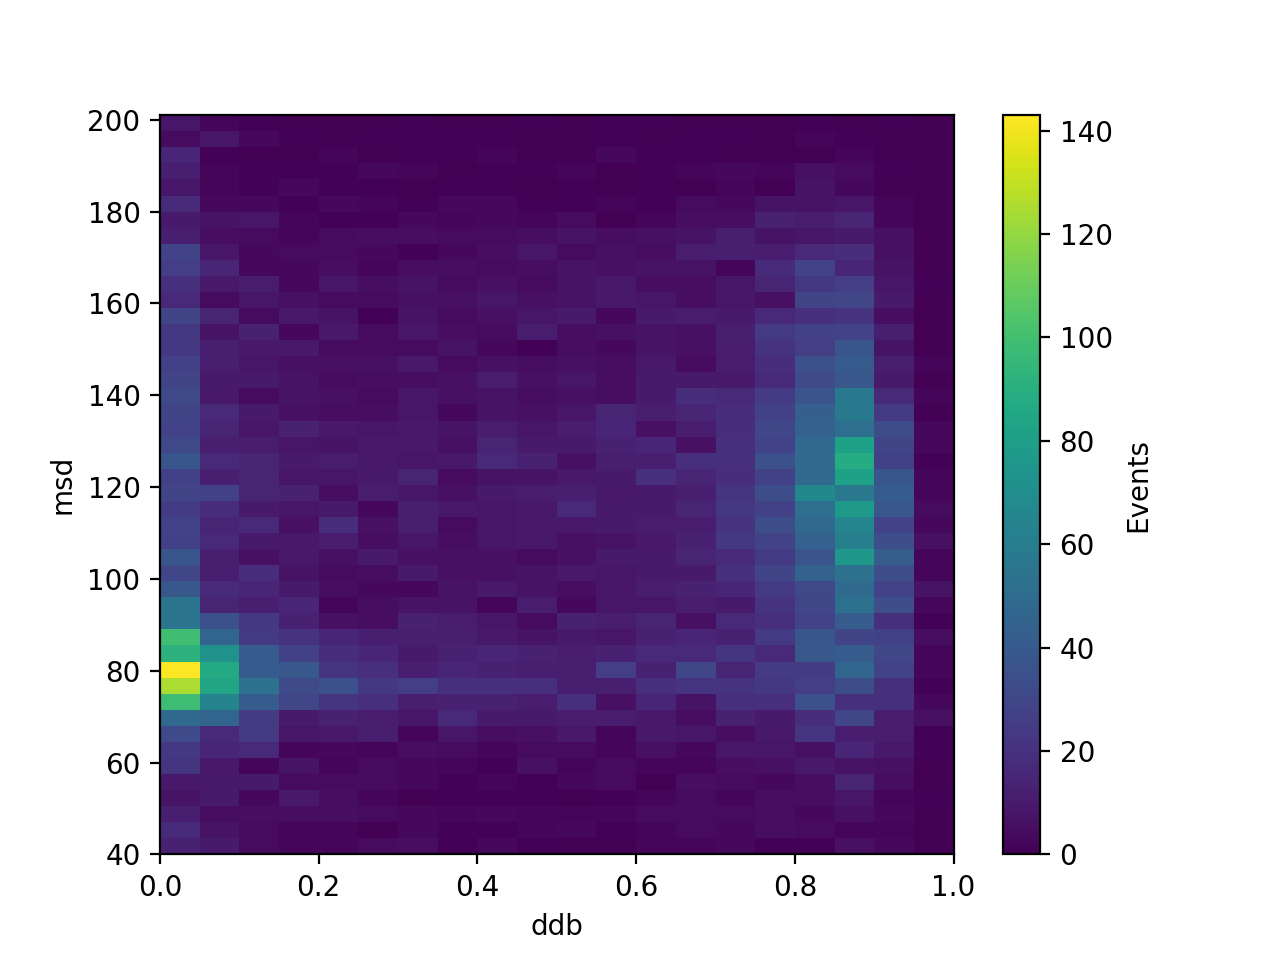

(<Figure size 640x480 with 2 Axes>,
 {'patches': <matplotlib.collections.PatchCollection at 0x197f72ba8>})

In [111]:
h = hist.Hist("Events", hist.Bin("ddb", "ddb", 20, 0, 1), hist.Bin("msd", "msd", 23*2, 40, 201))
cut = (pt0>450.) & (n2_jet0<.257) & ~os_bveto  # 50% of N2 DDT map values are between 0.24 and 0.27
h.fill(msd=msd0[cut], ddb=ddb0[cut])
plot.plot2d(h, xaxis="ddb", patch_opts={})

In [56]:
hbveto = hist.Hist("Events", 
                   hist.Cat("Jet", "AK4 jet #"),
                   hist.Bin("dphi", "dphi", 20, 0, np.pi),
                   hist.Bin("deepcsv", "deepcsv", [-1., 0.1522, 0.4941, 0.8001])
                  )
cut = (pt0>450.) & (n20<.257) & (ddb0>0.89)

hbveto.fill(Jet="0", dphi=np.abs(ak4jet0_dPhi08), deepcsv=ak4jet0_deepcsv, weight=cut)
hbveto.fill(Jet="1", dphi=np.abs(ak4jet1_dPhi08), deepcsv=ak4jet1_deepcsv, weight=cut)
hbveto.fill(Jet="2", dphi=np.abs(ak4jet2_dPhi08), deepcsv=ak4jet2_deepcsv, weight=cut)

<IPython.core.display.Javascript object>


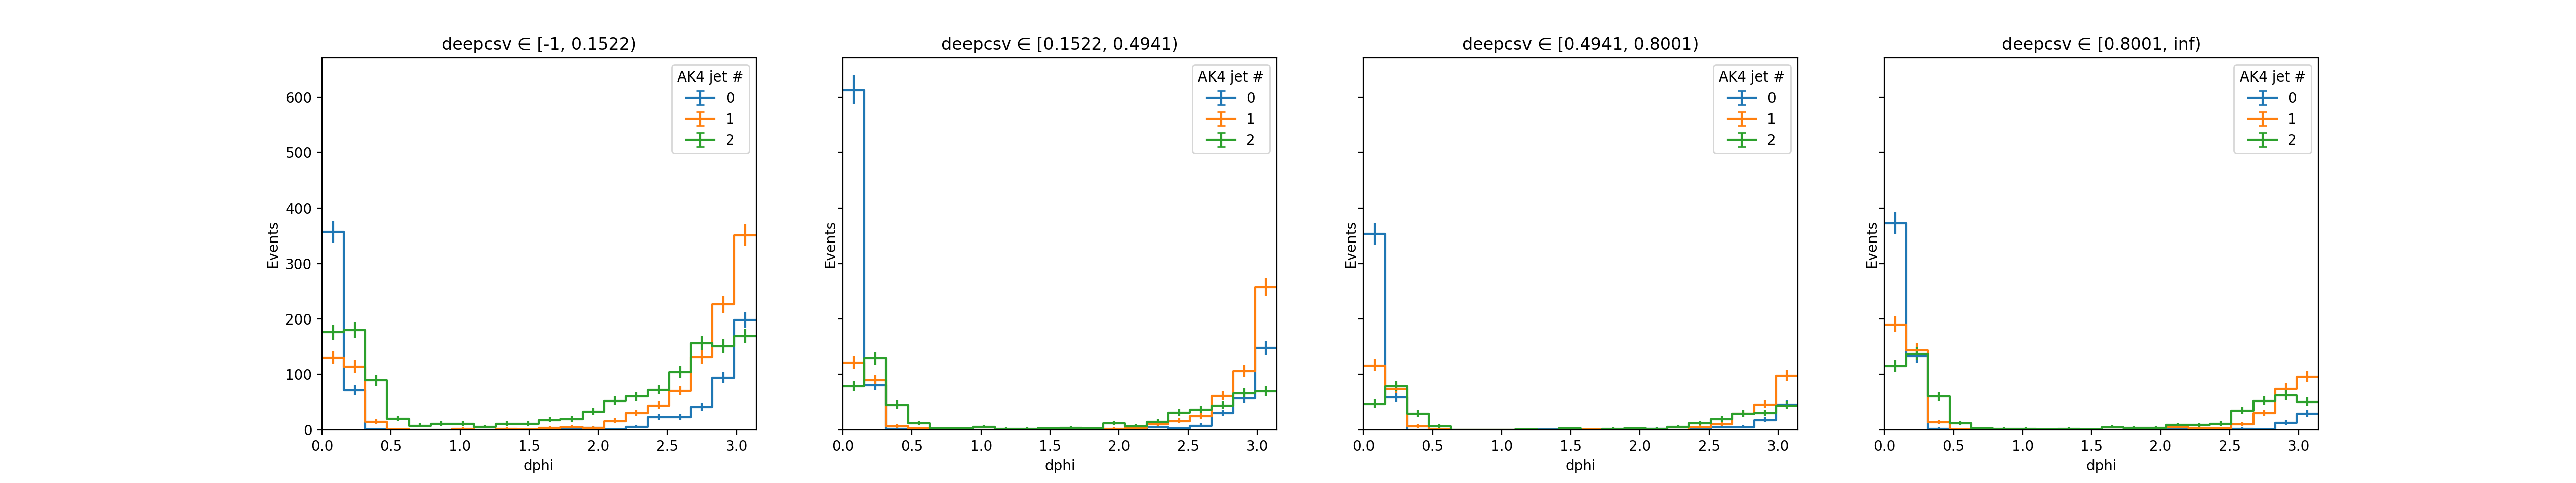

(<Figure size 2560x480 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137570278>,
       dtype=object))

In [112]:
plot.plotgrid(hbveto, col='deepcsv', overlay='Jet', error_opts={}, density=False, col_overflow='over')